In [1]:
import numba
import sys
sys.path.insert(0, './python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [2]:
%matplotlib inline

In [3]:
Degree = 3# degree
Height = 2 # Height of the tree

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


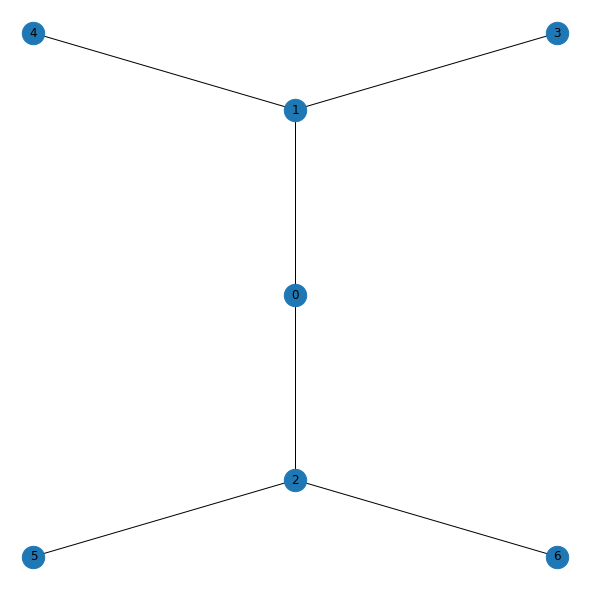

[[6, 4], [1, 3]]


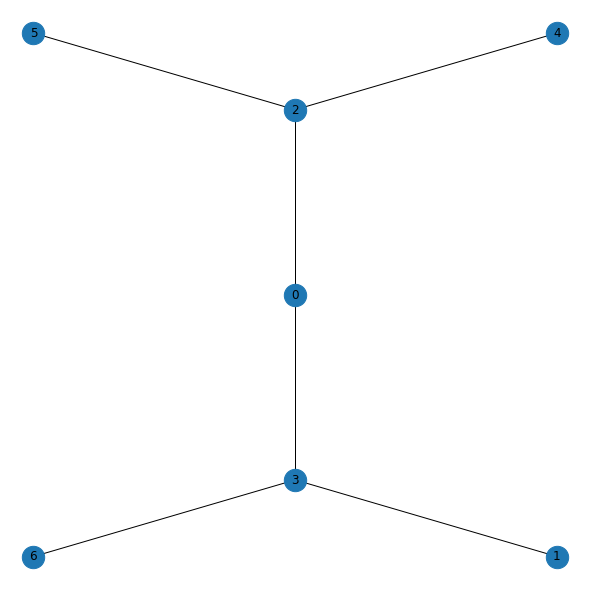

In [4]:
import imp 

import graph_gen
imp.reload(graph_gen)
N, J_interaction = graph_gen.tree_interaction(Degree,Height)

#H = np.random.random(N)
H = np.zeros(N)

num_swap = 2
swaps = []
nodes = list(range(N))
for n in range(num_swap):
    ss_temp = random.sample(nodes, 2)
    swaps.append(ss_temp)
    #print(ss_temp)
    nodes.remove(ss_temp[0])
    nodes.remove(ss_temp[1])
    
print(swaps)

J_interaction_rand = J_interaction.copy()
H_rand = H.copy()

for w in swaps:
    rev = list(reversed(w))
    J_interaction_rand[w] = J_interaction_rand[rev] 
    J_interaction_rand[:,w] = J_interaction_rand[:,rev] 
    H_rand[w] = H_rand[rev]
J_interaction_rand
graph_gen.plot_matrix_graph(J_interaction_rand)

betas = np.arange(1e-6,2,1e-2)
betas_fast =np.arange(1e-6,2,2e-1)

j_start = 1
j = graph_gen.fixed_value(j_start)
J = graph_gen.set_J(J_interaction, j)
J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [5]:
tree = model.model(N, H, J, J_interaction)
tree_rand = model.model(N, H_rand, J_rand, J_interaction_rand)


In [6]:
res_ex = solvers.exact_sol(tree, betas_fast)

beta: 0.0, Fe: -693147.181 Energy: -8.57e-07 M: 6.94e-18 S: 0.693
beta: 0.2, Fe: -3.551 Energy: -0.169 M: 7.04e-18 S: 0.676
beta: 0.4, Fe: -1.900 Energy: -0.326 M: 0.0 S: 0.63
beta: 0.6, Fe: -1.398 Energy: -0.46 M: 0.0 S: 0.563
beta: 0.8, Fe: -1.178 Energy: -0.569 M: 0.0 S: 0.487
beta: 1.0, Fe: -1.065 Energy: -0.653 M: 0.0 S: 0.412
beta: 1.2, Fe: -1.002 Energy: -0.715 M: 0.0 S: 0.345
beta: 1.4, Fe: -0.964 Energy: -0.759 M: 0.0 S: 0.287
beta: 1.6, Fe: -0.940 Energy: -0.79 M: 0.0 S: 0.241
beta: 1.8, Fe: -0.925 Energy: -0.812 M: 0.0 S: 0.204


In [8]:
import bp_nn
res_nn = solvers.nn_sol(tree, betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False, 
                        nn_use = bp_nn.bp_nn)
res_nn["name"]="nn"

fe: -693147.183 std_fe: 4.99E-02 M: -0.003 S: 0.693 E: -0.0010.00171, W: 2.10232e-06, 2.05573e-06, Bias: -0.000000 - 0.000000000399

fe: -3.551 std_fe: 7.35E-05 M: 0.004 S: 0.677 E: -0.166 -0.0337, W: 0.39995, 0.399942, Bias: -0.000031 - -0.000081092

fe: -1.900 std_fe: 8.94E-05 M: 0.004 S: 0.631 E: -0.323 -0.00886, W: 0.800006, 0.799914, Bias: 0.000256 - -0.0003688

fe: -1.398 std_fe: 6.44E-05 M: -0.007 S: 0.566 E: -0.4550.00543, W: 1.19997, 1.20037, Bias: -0.000040 - -0.0001453

fe: -1.178 std_fe: 7.32E-05 M: -0.008 S: 0.486 E: -0.5710.024, W: 1.60026, 1.60037, Bias: -0.000057 - 0.000123859

fe: -1.065 std_fe: 8.03E-05 M: -0.009 S: 0.416 E: -0.649-0.00543, W: 2.00071, 2.00081, Bias: -0.000241 - -0.000445

fe: -1.002 std_fe: 8.20E-05 M: 0.014 S: 0.340 E: -0.718 0.0169, W: 2.4011, 2.40082, Bias: 0.000036 - -0.0000976594

fe: -0.964 std_fe: 8.90E-05 M: -0.011 S: 0.283 E: -0.762-0.0103, W: 2.8015, 2.8016, Bias: -0.000335 - 0.000456563

fe: -0.940 std_fe: 9.75E-05 M: 0.003 S: 0.245 E: -0.

In [9]:
import bp_nn_2
imp.reload(bp_nn_2)
import solvers
imp.reload(solvers)
res_nn_2 = solvers.nn_sol(tree, betas_fast, max_step=1000, 
                          bias = True, 
                        z2 = False, x_hat_clip = False,
                         nn_use = bp_nn_2.bp_nn_2)
res_nn_2["name"]="nn_2"

fe: -693147.183 std_fe: 2.26E-02 M: 0.000 S: 0.693 E: -0.006: 0.00714, W: 2.1102e-06, 2.05459e-06, Bias: 0.000000 - 0.000000000059

fe: -3.551 std_fe: 7.16E-05 M: 0.006 S: 0.677 E: -0.168 -0.00914, W: 0.399934, 0.39991, Bias: -0.000060 - 0.00000747

fe: -1.900 std_fe: 8.16E-05 M: 0.002 S: 0.632 E: -0.319 0.00571, W: 0.799787, 0.799813, Bias: -0.000009 - -0.0000270

fe: -1.398 std_fe: 6.37E-05 M: 0.005 S: 0.560 E: -0.465 0.0474, W: 1.20007, 1.20013, Bias: 0.000227 - -0.00018072112

fe: -1.178 std_fe: 7.12E-05 M: 0.003 S: 0.484 E: -0.573 0.00486, W: 1.60028, 1.60051, Bias: 0.000091 - -0.0001684

fe: -1.065 std_fe: 7.94E-05 M: -0.006 S: 0.414 E: -0.651-0.00457, W: 2.00068, 2.00069, Bias: 0.000249 - 0.00019777

fe: -1.002 std_fe: 8.77E-05 M: -0.002 S: 0.341 E: -0.7170.0143, W: 2.40125, 2.40078, Bias: 0.000047 - 0.0000292183

fe: -0.964 std_fe: 8.50E-05 M: -0.008 S: 0.288 E: -0.758-0.0137, W: 2.80156, 2.80142, Bias: -0.000054 - -0.000375

fe: -0.940 std_fe: 9.28E-05 M: -0.003 S: 0.239 E: -0

In [11]:
import bp_nn_2
imp.reload(bp_nn_2)
import solvers
imp.reload(solvers)

nn_2_rand = solvers.nn_sol(tree_rand, betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False,
                         nn_use = bp_nn_2.bp_nn_2)
nn_2_rand["name"]="nn_2_rand"

fe: -693147.183 std_fe: 3.11E-02 M: 0.006 S: 0.693 E: 0.002: 0.0229, W: -0.0, 2.19481e-06, Bias: -0.000000 - -0.0000000000774

fe: -3.550 std_fe: 2.80E-02 M: 0.010 S: 0.677 E: -0.168 0.0177, W: -0.0, 0.401125, Bias: 0.003293 - -0.0006648061

fe: -1.896 std_fe: 5.20E-02 M: -0.008 S: 0.633 E: -0.313-0.012, W: -0.0, 0.79645, Bias: 0.001349 - -0.00468320591

fe: -1.388 std_fe: 7.08E-02 M: 0.002 S: 0.578 E: -0.424 0.00486, W: -0.0, 1.19664, Bias: 0.011792 - 0.002555024

fe: -1.159 std_fe: 8.46E-02 M: -0.005 S: 0.517 E: -0.5130.0257, W: -0.0, 1.60742, Bias: -0.009331 - -0.003065896

fe: -1.036 std_fe: 9.46E-02 M: 0.018 S: 0.462 E: -0.574 -0.000571, W: -0.0, 2.0121, Bias: 0.012637 - 0.016671484

fe: -0.962 std_fe: 1.02E-01 M: 0.004 S: 0.415 E: -0.616 0.0146, W: -0.0, 2.38499, Bias: -0.008975 - 0.0293171255

fe: -0.916 std_fe: 1.07E-01 M: 0.039 S: 0.374 E: -0.649 0.0151, W: -0.0, 2.79487, Bias: 0.087467 - 0.0893307954

fe: -0.890 std_fe: 5.22E-02 M: 0.680 S: 0.235 E: -0.743 0.673, W: -0.0, 3.1

In [12]:
res_nn_rand = solvers.nn_sol(tree_rand, betas_fast, max_step=1000, bias = True, batch_size=10000,
                        z2 = False, x_hat_clip = False)
res_nn_rand["name"]="nn_rand"

res_nn_rand_n = solvers.nn_sol_normed(tree_rand, betas_fast, max_step=1000, bias = True, batch_size=10000,
                        z2 = False, x_hat_clip = False)
res_nn_rand_n["name"]="nn_rand_n"

fe: -693147.183 std_fe: 3.66E-02 M: 0.001 S: 0.693 E: 0.006M: 0.00283, W: 0.0, 2.18482e-06, Bias: -0.000000 - 0.0000000035

fe: -3.550 std_fe: 2.79E-02 M: -0.001 S: 0.677 E: -0.165 -0.0006, W: 0.0, 0.399881, Bias: 0.000445 - -0.00221423

fe: -1.897 std_fe: 5.19E-02 M: 0.006 S: 0.632 E: -0.318: -0.00851, W: 0.0, 0.800523, Bias: -0.002709 - 0.0012470

fe: -1.388 std_fe: 7.07E-02 M: 0.006 S: 0.577 E: -0.427: -0.00169, W: 0.0, 1.19717, Bias: 0.001044 - -0.0037762

fe: -1.157 std_fe: 8.45E-02 M: -0.008 S: 0.519 E: -0.509 -0.00103, W: 0.0, 1.59917, Bias: -0.005862 - -0.011568

fe: -1.036 std_fe: 9.47E-02 M: 0.009 S: 0.462 E: -0.574: -0.00214, W: 0.0, 1.99744, Bias: 0.015238 - 0.01162166

fe: -0.961 std_fe: 1.02E-01 M: -0.008 S: 0.414 E: -0.616 0.00286, W: 0.0, 2.41139, Bias: 0.026297 - 0.024983327

fe: -0.915 std_fe: 9.06E-02 M: 0.350 S: 0.345 E: -0.668: 0.349, W: 0.0, 2.81835, Bias: 0.833106 - 0.828198

fe: -0.889 std_fe: 5.34E-02 M: 0.665 S: 0.238 E: -0.741: 0.656, W: 0.0, 3.20925, Bias: 1

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [91]:
res_nn_rand_n = solvers.nn_sol_normed(tree_rand, betas_fast, max_step=1000, bias = True, batch_size=10000,
                        z2 = False, x_hat_clip = False)
res_nn_rand_n["name"]="nn_rand_n"

fe: -693147.199 std_fe: 4.39E-02 M: -0.004 S: 0.693 E: -0.004 0.00746, W: 0.0, -0.0, Bias: -0.000000 - -0.000000057
fe: -3.557 std_fe: 3.12E-02 M: 0.007 S: 0.675 E: -0.182: 0.00566, W: 0.0, -0.0, Bias: 0.000008 - 0.000324091
fe: -1.905 std_fe: 5.71E-02 M: -0.000 S: 0.626 E: -0.340 -0.00474, W: 0.0, -0.0, Bias: -0.004981 - 0.0008747
fe: -1.390 std_fe: 6.93E-02 M: -0.114 S: 0.558 E: -0.460 -0.111, W: 0.0, -0.0, Bias: -0.285841 - -0.403894
 0.80 62 fe: -1.172 +- 0.06940 E: -0.551, S: 0.486, M: -0.35, W: 0.0, -0.0, Bias: -0.733948 - -0.9468176

KeyboardInterrupt: 

In [9]:
res_bp = solvers.bp_sol(tree, betas_fast)
res_bp["name"]="bp"

fe: -693147.181, ener: -0.000, M: 0.000, iter 3
fe: -6.977, ener: -0.092, M: 0.000, iter 1
fe: -3.557, ener: -0.182, M: 0.000, iter 1
fe: -2.447, ener: -0.269, M: 0.000, iter 1
fe: -1.913, ener: -0.351, M: 0.000, iter 1
fe: -1.608, ener: -0.427, M: 0.000, iter 1
fe: -1.417, ener: -0.496, M: 0.000, iter 1
fe: -1.290, ener: -0.558, M: 0.000, iter 1
fe: -1.202, ener: -0.613, M: 0.000, iter 1
fe: -1.139, ener: -0.661, M: 0.000, iter 1
fe: -1.094, ener: -0.703, M: 0.000, iter 1
fe: -1.060, ener: -0.739, M: 0.000, iter 1
fe: -1.034, ener: -0.770, M: 0.000, iter 1
fe: -1.015, ener: -0.795, M: 0.000, iter 1
fe: -1.000, ener: -0.817, M: 0.000, iter 1
fe: -0.989, ener: -0.836, M: 0.000, iter 1
fe: -0.979, ener: -0.851, M: 0.000, iter 1
fe: -0.972, ener: -0.863, M: 0.000, iter 1
fe: -0.967, ener: -0.874, M: 0.000, iter 1
fe: -0.962, ener: -0.883, M: 0.000, iter 1


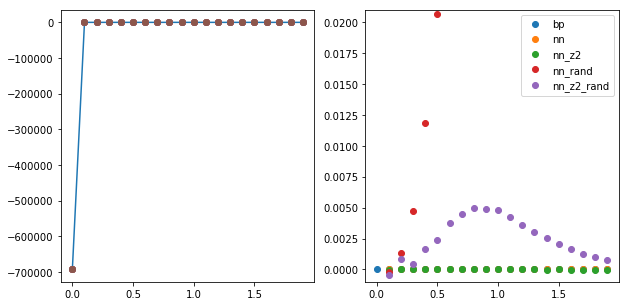

In [10]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_z2,
                                          res_nn_rand, res_nn_z2_rand])
plt.ylim(-0.001,0.021)
plt.show()

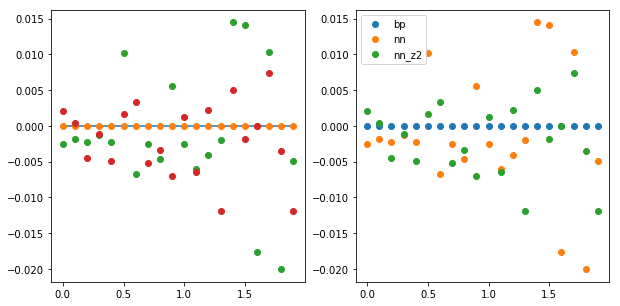

In [11]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_z2])
plt.show()

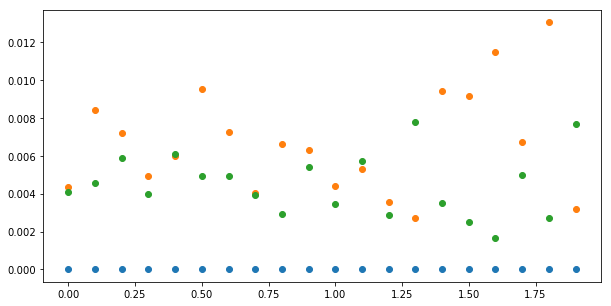

In [12]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_z2])
plt.show()

# With random field

In [6]:
H = np.random.random(N)
H_rand = H.copy()

for w in swaps:
    rev = list(reversed(w))
    H_rand[w] = H_rand[rev]


In [7]:
H_rand

array([0.3948683 , 0.45208333, 0.50844868, 0.57703423, 0.38360935,
       0.89949321, 0.20015542, 0.46194275, 0.31244523, 0.72907781,
       0.47399093, 0.33879398, 0.92341795])

In [8]:
H

array([0.3948683 , 0.45208333, 0.47399093, 0.20015542, 0.92341795,
       0.72907781, 0.57703423, 0.46194275, 0.31244523, 0.89949321,
       0.50844868, 0.33879398, 0.38360935])

In [9]:
tree = model.model(N, H, J, J_interaction)
tree_rand = model.model(N, H_rand, J_rand, J_interaction_rand)

res_ex = solvers.exact_sol(tree, betas_fast)

res_nn = solvers.nn_sol(tree, betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"
res_nn_rand = solvers.nn_sol(tree_rand, betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn_rand["name"]="nn_rand"

res_bp = solvers.bp_sol(tree, betas_fast)
res_bp["name"]="bp"

beta: 0.0, Fe: -693147.181 Energy: -1.23e-06 M: 5.12e-07 S: 0.693
beta: 0.1, Fe: -6.995 Energy: -0.13 M: 0.0611 S: 0.687
beta: 0.2, Fe: -3.599 Energy: -0.281 M: 0.149 S: 0.664
beta: 0.3, Fe: -2.522 Energy: -0.459 M: 0.27 S: 0.6198
beta: 0.4, Fe: -2.031 Energy: -0.66 M: 0.419 S: 0.5483
beta: 0.5, Fe: -1.777 Energy: -0.858 M: 0.571 S: 0.459
beta: 0.6, Fe: -1.638 Energy: -1.02 M: 0.698 S: 0.3684
beta: 0.7, Fe: -1.560 Energy: -1.15 M: 0.791 S: 0.2890
beta: 0.8, Fe: -1.514 Energy: -1.23 M: 0.854 S: 0.2251
beta: 0.9, Fe: -1.486 Energy: -1.29 M: 0.897 S: 0.1764
beta: 1.0, Fe: -1.469 Energy: -1.33 M: 0.926 S: 0.1370
beta: 1.1, Fe: -1.458 Energy: -1.36 M: 0.947 S: 0.1087
beta: 1.2, Fe: -1.450 Energy: -1.38 M: 0.961 S: 0.0845
beta: 1.3, Fe: -1.446 Energy: -1.39 M: 0.972 S: 0.0663
beta: 1.4, Fe: -1.442 Energy: -1.41 M: 0.979 S: 0.0522
beta: 1.5, Fe: -1.440 Energy: -1.41 M: 0.985 S: 0.0408
beta: 1.6, Fe: -1.439 Energy: -1.42 M: 0.989 S: 0.0319
beta: 1.7, Fe: -1.438 Energy: -1.42 M: 0.991 S: 0.0250

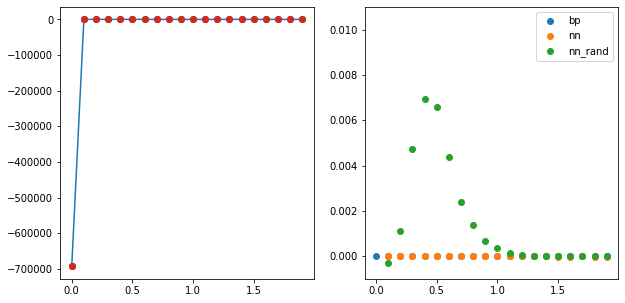

In [10]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_rand])
plt.ylim(-0.001,0.011)
plt.show()

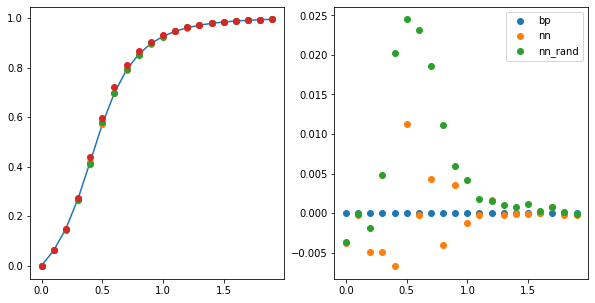

In [11]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_rand])
plt.show()

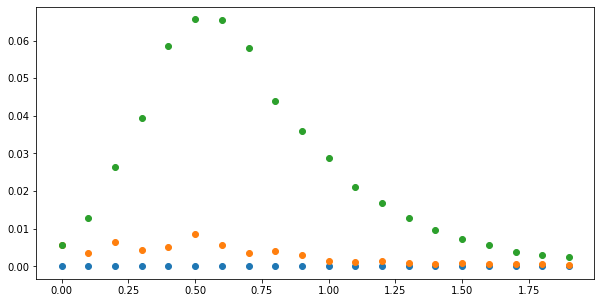

In [12]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_rand])
plt.show()

In [15]:
res_ex["betas"]

array([1.000000e-06, 1.000010e-01, 2.000010e-01, 3.000010e-01,
       4.000010e-01, 5.000010e-01, 6.000010e-01, 7.000010e-01,
       8.000010e-01, 9.000010e-01, 1.000001e+00, 1.100001e+00,
       1.200001e+00, 1.300001e+00, 1.400001e+00, 1.500001e+00,
       1.600001e+00, 1.700001e+00, 1.800001e+00, 1.900001e+00])

In [17]:
res_ex["M_i"][5]

array([0.72504037, 0.75453433, 0.70919487, 0.59350144, 0.64890101,
       0.59632523, 0.55128796, 0.49477803, 0.44400976, 0.62481854,
       0.45908696, 0.40091835, 0.41663615])

In [18]:
res_bp["M_i"][5]

array([0.72504037, 0.75453432, 0.70919487, 0.59350144, 0.64890101,
       0.59632523, 0.55128796, 0.49477803, 0.44400976, 0.62481854,
       0.45908695, 0.40091835, 0.41663615])

In [19]:
res_nn["M_i"][5]

array([0.7396, 0.7628, 0.725 , 0.6106, 0.6458, 0.5918, 0.546 , 0.5224,
       0.4648, 0.6458, 0.4742, 0.4172, 0.4196], dtype=float32)

In [20]:
res_nn_rand["M_i"][5]

array([0.7762, 0.7676, 0.497 , 0.5522, 0.4406, 0.6508, 0.6414, 0.5376,
       0.458 , 0.5896, 0.7726, 0.413 , 0.6408], dtype=float32)

In [31]:
swaps

[[5, 9], [4, 12], [2, 10], [3, 6]]

In [35]:
M_i_rand = res_nn_rand["M_i"][5].copy()
for w in swaps:
    #rev = list(reversed(w))
    M_i_rand[w[1]] = res_nn_rand["M_i"][5][w[0]]
    M_i_rand[w[0]] = res_nn_rand["M_i"][5][w[1]]

In [36]:
M_i_rand

array([0.7762, 0.7676, 0.7726, 0.6414, 0.6408, 0.5896, 0.5522, 0.5376,
       0.458 , 0.6508, 0.497 , 0.413 , 0.4406], dtype=float32)

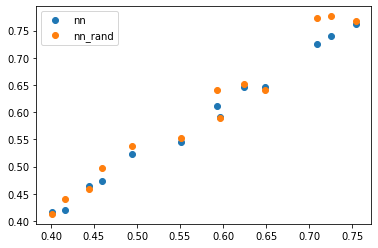

In [39]:
import matplotlib.pyplot as plt
plt.plot(res_ex["M_i"][5], res_nn["M_i"][5], "o", label="nn")
plt.plot(res_ex["M_i"][5], M_i_rand,"o", label="nn_rand")
plt.legend()
plt.show()